# Setup environment

## Google Drive

In [ ]:
# mount files from google drive
# and follow the steps here
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

# Face recognition

In [ ]:
!pip install argparse

## CUDA

In [ ]:
!sudo apt install cuda-toolkit-11-8

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  cuda-cccl-11-8 cuda-command-line-tools-11-8 cuda-compiler-11-8
  cuda-cudart-11-8 cuda-cudart-dev-11-8 cuda-cuobjdump-11-8 cuda-cupti-11-8
  cuda-cupti-dev-11-8 cuda-cuxxfilt-11-8 cuda-documentation-11-8
  cuda-driver-dev-11-8 cuda-gdb-11-8 cuda-libraries-11-8
  cuda-libraries-dev-11-8 cuda-memcheck-11-8 cuda-nsight-11-8
  cuda-nsight-compute-11-8 cuda-nsight-systems-11-8 cuda-nvcc-11-8
  cuda-nvdisasm-11-8 cuda-nvml-dev-11-8 cuda-nvprof-11-8 cuda-nvprune-11-8
  cuda-nvrtc-11-8 cuda-nvrtc-dev-11-8 cuda-nvtx-11-8 cuda-nvvp-11-8
  cuda-profiler-api-11-8 cuda-sanitizer-11-8 cuda-toolkit-11-8-config-common
  cuda-toolkit-11-config-common cuda-tools-11-8 cuda-visual-tools-11-8
  default-jre default-jre-headless fonts-dejavu-core fonts-dejavu-extra
  gds-tools-11-8 libatk-wrapper-java libatk-wrapper-java-jni libcublas-11-8
  libcublas-dev-11-

## Faceswap

In [ ]:
#@markdown #**Clone github & download models**

# we should upload all these models to the google drive later

!git clone https://github.com/sberbank-ai/sber-swap.git
%cd sber-swap

# load arcface
!wget -P ./arcface_model https://github.com/sberbank-ai/sber-swap/releases/download/arcface/backbone.pth
!wget -P ./arcface_model https://github.com/sberbank-ai/sber-swap/releases/download/arcface/iresnet.py

# load landmarks detector
!wget -P ./insightface_func/models/antelope https://github.com/sberbank-ai/sber-swap/releases/download/antelope/glintr100.onnx
!wget -P ./insightface_func/models/antelope https://github.com/sberbank-ai/sber-swap/releases/download/antelope/scrfd_10g_bnkps.onnx

# load model itself
!wget -P ./weights https://github.com/sberbank-ai/sber-swap/releases/download/sber-swap-v2.0/G_unet_2blocks.pth

# load super res model
!wget -P ./weights https://github.com/sberbank-ai/sber-swap/releases/download/super-res/10_net_G.pth

Cloning into 'sber-swap'...
remote: Enumerating objects: 707, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 707 (delta 20), reused 21 (delta 20), pack-reused 677
Receiving objects: 100% (707/707), 94.00 MiB | 28.86 MiB/s, done.
Resolving deltas: 100% (176/176), done.
/content/sber-swap
--2024-01-07 01:23:46--  https://github.com/sberbank-ai/sber-swap/releases/download/arcface/backbone.pth
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/ai-forever/ghost/releases/download/arcface/backbone.pth [following]
--2024-01-07 01:23:46--  https://github.com/ai-forever/ghost/releases/download/arcface/backbone.pth
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://objects.githubusercontent.com/github-producti

In [ ]:
#@markdown #**Install required libraries**

!pip install mxnet-cu112
!pip install onnxruntime-gpu==1.12
!pip install insightface==0.2.1
!pip install kornia==0.5.4
!pip install dill

!rm /usr/local/lib/python3.10/dist-packages/insightface/model_zoo/model_zoo.py #change the path to python in case you use a different version
!wget -P /usr/local/lib/python3.10/dist-packages/insightface/model_zoo/ https://github.com/AlexanderGroshev/insightface/releases/download/model_zoo/model_zoo.py #change the path to python in case you use a different version

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.4/499.4 MB 3.3 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.7/285.7 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 3.5 MB/s eta 0:00:00
--2024-01-07 01:25:04--  https://github.com/AlexanderGroshev/insightface/releases/download/model_zoo/model_zoo.py
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting respo

In [ ]:
!wget https://developer.nvidia.com/compute/cuda/11.8.0/local_installers/cuda_11.8.0_495.29.03_linux.run
!chmod +x cuda_11.8.0_495.29.03_linux.run
!sudo ./cuda_11.8.0_495.29.03_linux.run

--2024-01-07 01:25:05--  https://developer.nvidia.com/compute/cuda/11.8.0/local_installers/cuda_11.8.0_495.29.03_linux.run
Resolving developer.nvidia.com (developer.nvidia.com)... 152.195.19.142
Connecting to developer.nvidia.com (developer.nvidia.com)|152.195.19.142|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-01-07 01:25:06 ERROR 404: Not Found.

chmod: cannot access 'cuda_11.8.0_495.29.03_linux.run': No such file or directory
sudo: ./cuda_11.8.0_495.29.03_linux.run: command not found


In [ ]:
#@markdown #**Preparation**

import cv2
import torch
import time
import os

from utils.inference.image_processing import crop_face, get_final_image, show_images
from utils.inference.video_processing import read_video, get_target, get_final_video, add_audio_from_another_video, face_enhancement
from utils.inference.core import model_inference

from network.AEI_Net import AEI_Net
from coordinate_reg.image_infer import Handler
from insightface_func.face_detect_crop_multi import Face_detect_crop
from arcface_model.iresnet import iresnet100
from models.pix2pix_model import Pix2PixModel
from models.config_sr import TestOptions
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.10/dist-packages/kornia/augmentation/augmentation.py:1830: DeprecationWarning: GaussianBlur is no longer maintained and will be removed from the future versions. Please use RandomGaussianBlur instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mxnet/numpy/utils.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bool = onp.bool
/usr/local/lib/python3.10/dist-packages/mxnet/numpy/fallback.py:143: DeprecationWarning: In accordance with NEP 32, the function mirr was removed from NumPy version 1.20.  A replacement for this function is available in the numpy_financial library: https://pypi.org/project/numpy-financial
  mirr = onp.mirr

In [ ]:
#@markdown #**Initialize models**

app = Face_detect_crop(name='antelope', root='./insightface_func/models')
app.prepare(ctx_id= 0, det_thresh=0.6, det_size=(640,640))

# main model for generation
G = AEI_Net(backbone='unet', num_blocks=2, c_id=512)
G.eval()
G.load_state_dict(torch.load('weights/G_unet_2blocks.pth', map_location=torch.device('cpu')))
G = G.cuda()
G = G.half()

# arcface model to get face embedding
netArc = iresnet100(fp16=False)
netArc.load_state_dict(torch.load('arcface_model/backbone.pth'))
netArc=netArc.cuda()
netArc.eval()

# model to get face landmarks
handler = Handler('./coordinate_reg/model/2d106det', 0, ctx_id=0, det_size=640)

# model to make superres of face, set use_sr=True if you want to use super resolution or use_sr=False if you don't
use_sr = True
if use_sr:
    os.environ['CUDA_VISIBLE_DEVICES'] = '0'
    torch.backends.cudnn.benchmark = True
    opt = TestOptions()
    #opt.which_epoch ='10_7'
    model = Pix2PixModel(opt)
    model.netG.train()


input mean and std: 127.5 127.5
find model: ./insightface_func/models/antelope/glintr100.onnx recognition
find model: ./insightface_func/models/antelope/scrfd_10g_bnkps.onnx detection
set det-size: (640, 640)
loading ./coordinate_reg/model/2d106det 0
input mean and std: 127.5 127.5
find model: ./insightface_func/models/antelope/glintr100.onnx recognition
find model: ./insightface_func/models/antelope/scrfd_10g_bnkps.onnx detection
set det-size: (640, 640)
Network [LIPSPADEGenerator] was created. Total number of parameters: 72.2 million. To see the architecture, do print(network).
Load checkpoint from path:  weights/10_net_G.pth


In [ ]:
#@markdown #**Upload source image and video**

#@markdown choose not really long videos, coz it can take a lot of time otherwise

#@markdown choose source image as a photo -- preferable a selfie of a person

target_type = 'image' #@param ["video", "image"]


source_path = '/content/spiderman.png' #@param {type:"string"}
target_path = '/content/1.jpg' #@param {type:"string"}
path_to_video = 'examples/videos/nggyup.mp4' #@param {type:"string"}

source_full = cv2.imread(source_path)
OUT_VIDEO_NAME = "examples/results/result.mp4"
crop_size = 224 # don't change this


# check, if we can detect face on the source image

try:
    source = crop_face(source_full, app, crop_size)[0]
    source = [source[:, :, ::-1]]
    print("Everything is ok!")
except TypeError:
    print("Bad source images")

# read video
if target_type == 'image':
    target_full = cv2.imread(target_path)
    full_frames = [target_full]
else:
    full_frames, fps = read_video(path_to_video)

target = get_target(full_frames, app, crop_size)


Everything is ok!


224


In [ ]:
#@markdown #**Inference**


batch_size =  40#@param {type:"integer"}

START_TIME = time.time()

final_frames_list, crop_frames_list, full_frames, tfm_array_list = model_inference(full_frames,
                                                                                   source,
                                                                                   target,
                                                                                   netArc,
                                                                                   G,
                                                                                   app,
                                                                                   set_target = False,
                                                                                   crop_size=crop_size,
                                                                                   BS=batch_size)

if use_sr:
    final_frames_list = face_enhancement(final_frames_list, model)

if target_type == 'video':
  get_final_video(final_frames_list,
                  crop_frames_list,
                  full_frames,
                  tfm_array_list,
                  OUT_VIDEO_NAME,
                  fps,
                  handler)

  add_audio_from_another_video(path_to_video, OUT_VIDEO_NAME, "audio")

  print(f'Full pipeline took {time.time() - START_TIME}')
  print(f"Video saved with path {OUT_VIDEO_NAME}")
else:
  result = get_final_image(final_frames_list, crop_frames_list, full_frames[0], tfm_array_list, handler)
  cv2.imwrite('examples/results/result.png', result)



100%|██████████| 1/1 [00:00<00:00, 13.25it/s]
1it [00:00, 203.08it/s]
1it [00:00, 1835.58it/s]
100%|██████████| 1/1 [00:00<00:00, 9489.38it/s]
1it [00:00,  7.79it/s]


In [ ]:
# print(len(final_frames_list[0][0][0][0]))
# print(crop_frames_list)
# print(full_frames[0])
# print(tfm_array_list)

3


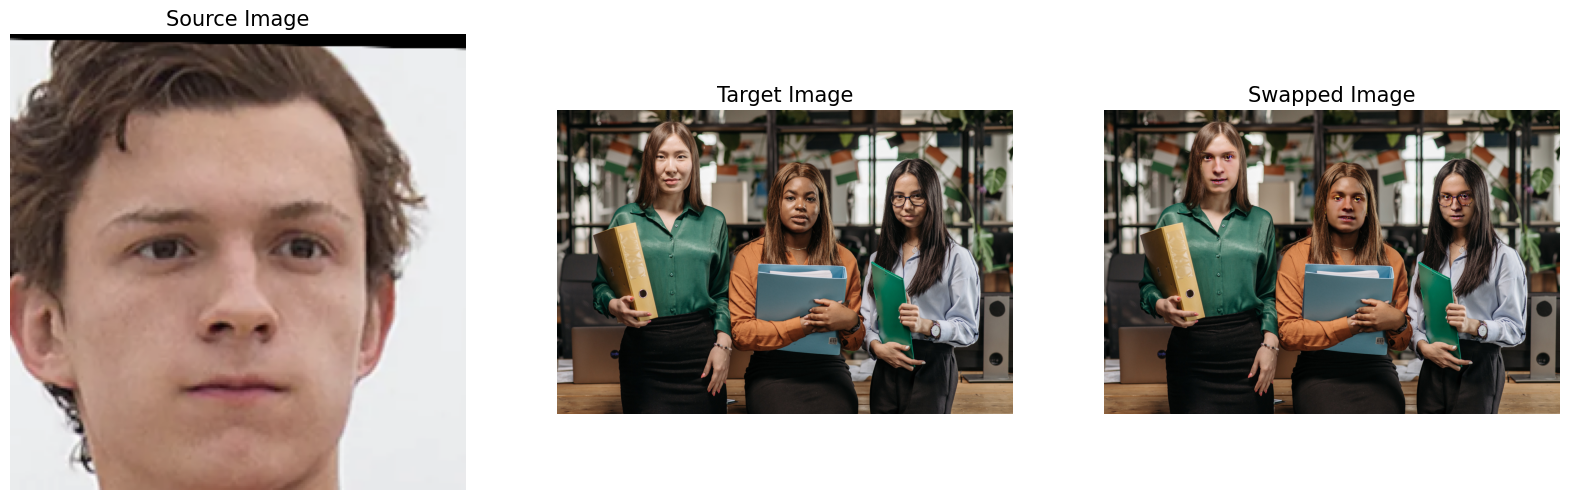

In [ ]:
#@markdown #**Visualize Image to Image swap**

import matplotlib.pyplot as plt

show_images([source[0][:, :, ::-1], target_full, result], ['Source Image', 'Target Image', 'Swapped Image'], figsize=(20, 15))


## StyleGAN

In [ ]:
# clone StyleGan repo from github
!git clone https://github.com/NVlabs/stylegan3

Cloning into 'stylegan3'...
remote: Enumerating objects: 212, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 212 (delta 0), reused 1 (delta 0), pack-reused 207
Receiving objects: 100% (212/212), 4.17 MiB | 8.92 MiB/s, done.
Resolving deltas: 100% (98/98), done.


In [ ]:
import stylegan3
%cd stylegan3
import dnnlib
import legacy

import os
import re
from typing import List, Optional, Tuple, Union

import click

import numpy as np
import PIL.Image
import torch

%cd ../
# %cd /content

/content/sber-swap/stylegan3
/content/sber-swap


## CLIP

In [ ]:
!pip install -r /content/CLIP_requirements.txt

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-m5s8pycd
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-m5s8pycd
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.9/205.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 41.5 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369497 sha256=80738596bf078ecd86160ecb4ef10b4e80eec320e415b8290bbb4c38ee269435
  Stored in directory: /tmp/pip-ephem-wheel-cache-0syg3d37/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5

In [ ]:
# might need to put all of them in a requirement.txt
!pip install \
  lpips \
  ftfy \
  regex \
  tqdm \
  git+https://github.com/openai/CLIP.git \
  click \
  requests \
  tqdm \
  pyspng \
  ninja \
  imageio-ffmpeg==0.4.3 \
  scipy \

ERROR: Invalid requirement: '\\'


In [ ]:
import logging
import os
import pathlib
import sys

sys.path.insert(0, "./StyleGAN")
sys.path.insert(0, "./StyleGan3_CLIP_Steering")
sys.path.insert(0, "./CLIP")

import clip
import IPython.display
import numpy as np
import torch
import torch.nn.functional as F
from PIL import Image


logging.basicConfig(
    format="%(asctime)s %(levelname)-8s %(message)s",
    level=logging.INFO,
    datefmt="%Y-%m-%d %H:%M:%S",
)

logger = logging.getLogger(__name__)

## Face recognition (face to text)

In [ ]:
!git clone https://github.com/smahesh29/Gender-and-Age-Detection.git

Cloning into 'Gender-and-Age-Detection'...
remote: Enumerating objects: 72, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 72 (delta 19), reused 14 (delta 13), pack-reused 49
Receiving objects: 100% (72/72), 90.73 MiB | 30.50 MiB/s, done.
Resolving deltas: 100% (25/25), done.


# Execution

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-7e9de17a-60aa-78e0-ac5b-839cc748ab95)


In [ ]:
import torch
import torchvision
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Selected device: {device}')
# !pip install click requests tqdm pyspng ninja imageio-ffmpeg==0.4.3

Selected device: cuda


In [ ]:
#@title StyleGAN functions
def get_G(
    network_pkl: str,
    class_idx: Optional[int]
    ):

    print('Loading networks from "%s"...' % network_pkl)

    with dnnlib.util.open_url(network_pkl) as f:
        G = legacy.load_network_pkl(f)['G_ema'].to(device) # type: ignore

    if G.c_dim != 0:
        if class_idx is None:
            raise click.ClickException('Must specify class label with --class when using a conditional network')
    else:
        if class_idx is not None:
            print ('warn: --class=lbl ignored when running on an unconditional network')

    return G


def generate_stylegan_images(
    G,
    z,
    y,
    truncation_psi: float = 1,
    noise_mode: str = 'const',
):
    # Generate images.
    w = G.mapping(z, y, truncation_psi=truncation_psi)
    imgs = G.synthesis(w, noise_mode=noise_mode, force_fp32 = True)

    imgs = (
        (imgs.permute(0, 2, 3, 1) * 127.5 + 128)
        .clamp(0, 255)
        .to(torch.uint8)
        .cpu()
        .numpy()
    )
    return [PIL.Image.fromarray(img, 'RGB') for img in imgs]

In [ ]:
#@title StyleGAN Helper functions
from PIL import Image
from typing import Optional, Tuple

def show_images_gan(
        images: list[Image.Image],
        resize: Optional[Tuple[int, int]] = None
    ):
    """Show a list of images in a row."""
    images = [np.array(img) for img in images]
    images = np.concatenate(images, axis=1)
    images = Image.fromarray(images)

    if resize:
        images.thumbnail(resize)

    IPython.display.display(images)


def show_and_save_images(
    images: list[Image.Image], batch: int, path: str, variant: str = "original"
):
    show_images(images)

    if not os.path.exists(path):
        os.makedirs(path)

    for i, img in enumerate(images):
        img.save(f"{path}/image_{batch}_{i}_{variant}.png")


def show_gan_results(gan_results: List[List[Tuple[Image.Image, np.ndarray]]]):
    for batch_results in gan_results:
        batch_size = len(batch_results[0][0])

        for i in range(batch_size):
            steering_images = [res[0][i] for res in batch_results]
            steering_scores = np.stack(
                [res[1][i].detach().cpu().numpy() for res in batch_results]
            ).tolist()
            print(steering_scores)
            show_images(steering_images, resize=(1024, 256))


def make_noise_and_class_vectors(num_samples: int, seed=None):
    noise_vector = torch.from_numpy(
        np.random.RandomState(seed).randn(num_samples, G_style.z_dim)
    ).to(device)
    class_vector = torch.zeros([num_samples, G_style.c_dim], device=device)

    return noise_vector, class_vector

def get_clip_probs(image_inputs, text_features, model, attribute_index=0):
    image_inputs = torch.stack([preprocess(img.resize((512, 512))) for img in image_inputs]).to(device)
    image_features = model.encode_image(image_inputs).float()

    # normalized features
    image_features = image_features / image_features.norm(dim=1, keepdim=True)
    text_features = text_features / text_features.norm(dim=1, keepdim=True)

    # cosine similarity as logits
    logit_scale = model.logit_scale.exp()
    logits_per_image = logit_scale * image_features @ text_features.t()

    clip_probs = logits_per_image.softmax(dim=-1)

    return clip_probs.narrow(dim=-1, start=attribute_index, length=1).squeeze(dim=-1)


def make_images_and_probs(
    model, z, y, truncation, clip_model, encoded_text, attribute_index=0
):
    gan_images = generate_stylegan_images(model, z, y, truncation_psi=truncation)
    clip_probs = get_clip_probs(gan_images, encoded_text, clip_model, attribute_index)

    return gan_images, clip_probs


In [ ]:
#@title Load Face generation algorithm
device = "cuda" if torch.cuda.is_available() else "cpu"

#######################################################
#      change this link to the directory of your Stylegan3 training result file on your google drive or local computer
#      it should have a similar name like this: network-snapshot-000012.pkl
#      For this assignment, if you fail to train a stylegan3 with your custom dataset,
#      you can also use a pre-trained model. You could find some pre-trained model here:  https://catalog.ngc.nvidia.com/orgs/nvidia/teams/research/models/stylegan3/files
#######################################################
G_style = get_G('https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-ffhqu-256x256.pkl', class_idx=None)

truncation = 0.5

Loading networks from "https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-ffhqu-256x256.pkl"...


Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "filtered_lrelu_plugin"... Done.


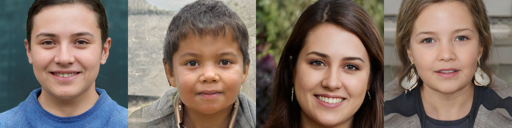

In [ ]:
# make_noise_and_class_vectors
noise_vector, class_vector = make_noise_and_class_vectors(
    num_samples=4
)
# Generate 4 images
output_images = generate_stylegan_images(
    G_style, noise_vector, class_vector, truncation_psi=truncation
)
show_images_gan(output_images, resize=(512, 512))

In [ ]:
#@title Load CLIP
clip_model, preprocess = clip.load("ViT-B/32", device=device)
clip_model.eval()
clip_model.to(device)

100%|████████████████████████████████████████| 338M/338M [00:03<00:00, 117MiB/s]


CLIP(
  (visual): VisionTransformer(
    (conv1): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32), bias=False)
    (ln_pre): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (transformer): Transformer(
      (resblocks): Sequential(
        (0): ResidualAttentionBlock(
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          )
          (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): Sequential(
            (c_fc): Linear(in_features=768, out_features=3072, bias=True)
            (gelu): QuickGELU()
            (c_proj): Linear(in_features=3072, out_features=768, bias=True)
          )
          (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
        (1): ResidualAttentionBlock(
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          

In [ ]:
#@title test CLIP model

#######################################################
#      Here is how we specify the desired attributes
#      You need at least two attributes. The training process will make the generated images closer to the first attribute
#      If you want describe the image in a very detailed way, you can add several confounding attributes after the first attribute
#      the caveat is that the clip model might not be able to tell the subtle difference between your descriptions.
#######################################################

# attributes = ["the front face of a person", 'a person']
attributes = ["the front face of a woman", 'a person']

attribute_index = 0  # which attribute do we want to maximize
text_descriptions = [f"{label}" for label in attributes]


with torch.no_grad():
    text_tokens = clip.tokenize(text_descriptions).to(device)
    text_features = clip_model.encode_text(text_tokens).float()
    # text_features = F.normalize(text_features, p=2, dim=-1)

text_features.shape

torch.Size([2, 512])

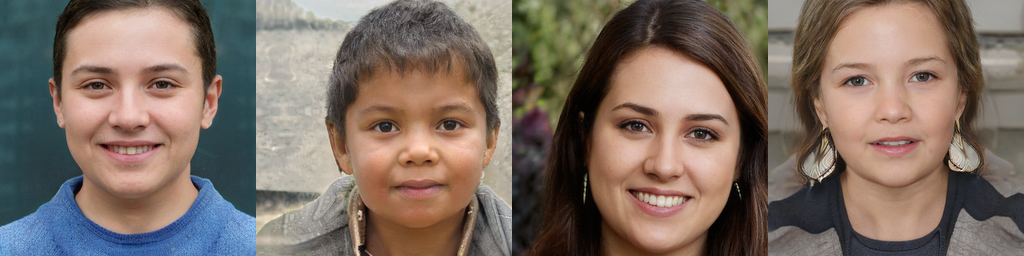

tensor([0.7944, 0.4033, 0.9469, 0.8054], device='cuda:0',
       grad_fn=<SqueezeBackward1>)

In [ ]:
#@ show Show CLIP score
show_images_gan(output_images, resize=(1024, 1024))
# the score is from softmax ranking. it indicates how similar your generated images are to the first description in your attributes list
get_clip_probs(output_images, text_features, clip_model, 0)

In [ ]:
output_images

[<PIL.Image.Image image mode=RGB size=256x256>,
 <PIL.Image.Image image mode=RGB size=256x256>,
 <PIL.Image.Image image mode=RGB size=256x256>,
 <PIL.Image.Image image mode=RGB size=256x256>]

In [ ]:
#@title Generate n Faces

def generate_correct_images(G_model, image_quota, textual_attribute_list=[["a black person", "a person"]], save_threshold=0.9, num_samples=4, iterations=100):
    n_image = 0

    # for i in range(0, iterations):
    while n_image < image_quota:
        ## generate images
        # make_noise_and_class_vectors
        noise_vector, class_vector = make_noise_and_class_vectors(
            num_samples=num_samples
        )
        # Generate num_samples images
        output_images = generate_stylegan_images(
            G_model, noise_vector, class_vector, truncation_psi=truncation
        )
        # show_images(output_images, resize=(512, 512))

        ## use clip model to measure the image
        attribute_index = 0  # which attribute do we want to maximize
        text_descriptions = [f"{label}" for label in textual_attribute_list[n_image]]

        with torch.no_grad():
            text_tokens = clip.tokenize(text_descriptions).to(device)
            text_features = clip_model.encode_text(text_tokens).float()
            # text_features = F.normalize(text_features, p=2, dim=-1)

        tensor_score = get_clip_probs(output_images, text_features, clip_model, 0)

        ## get the largest score and index inside the tensor
        # tensor_score[0].item()
        score_list = tensor_score.tolist()
        max_value = max(score_list)

        # if score is larger than a threshold, then save the iamge
        if max_value > save_threshold:
            max_index = score_list.index(max_value)
            # save a image using extension
            # add a white border border to shrink the face area
            im1 = PIL.ImageOps.expand(output_images[max_index], border=120, fill='white')
            im1 = im1.save("./image_{}.png".format(n_image+1))

            n_image += 1


In [ ]:
# execute
generate_correct_images(G_style, 3, textual_attribute_list=[attributes]*3, save_threshold=0.9, num_samples=4, iterations=100)



2


## Multiple faceswap

In [ ]:
#@markdown #**Upload source image and video**

#@markdown choose not really long videos, coz it can take a lot of time otherwise

#@markdown choose source image as a photo -- preferable a selfie of a person

target_type = 'image' #@param ["video", "image"]


# source_path = '/content/spiderman.png' #@param {type:"string"}
target_path = '/content/2.jpg' #@param {type:"string"}
path_to_video = 'examples/videos/nggyup.mp4' #@param {type:"string"}

# source_full = cv2.imread(source_path)
OUT_VIDEO_NAME = "examples/results/result.mp4"
crop_size = 224 # don't change this


# check, if we can detect face on the source image

# try:
#     source = crop_face(source_full, app, crop_size)[0]
#     source = [source[:, :, ::-1]]
#     print("Everything is ok!")
# except TypeError:
#     print("Bad source images")

# read video
if target_type == 'image':
    target_full = cv2.imread(target_path)
    full_frames = [target_full]
else:
    full_frames, fps = read_video(path_to_video)


In [ ]:
from insightface.utils import face_align
# process the target image to get all faces

def crop_face_loop(image_full, app, crop_size):
    """
    Crop face from image and resize
    """
    align_img_list = []
    kps = app.get(image_full, crop_size)
    for i, faces in enumerate(kps):
        M, _ = face_align.estimate_norm(kps[i], crop_size, mode ='None')
        align_img = cv2.warpAffine(image_full, M, (crop_size, crop_size), borderValue=0.0)
        align_img_list.append(align_img)

    return align_img_list

def get_target_loop(full_frames, app, crop_size):
    i = 0
    target = None
    while target is None:
        if i < len(full_frames):
            try:
                target = crop_face_loop(full_frames[i], app, crop_size)
            except TypeError:
                i += 1
        else:
            print("Video doesn't contain face!")
            break
    return target



224


In [ ]:
targets = get_target_loop(full_frames, app, crop_size)
targets = [[target] for target in targets]
print(len(targets[0][0]))

# img = Image.fromarray(targets[0], 'RGB')
# img.save('my.png')


In [ ]:
# skip
print(np.array(targets[0][0]).shape)
img_test = Image.fromarray(np.array(targets[0][0]), 'RGB')
img_test.save('target_object.jpg')

(224, 224, 3)


In [ ]:
#@title get the gender and the age range of the face
#A Gender and Age Detection program by Mahesh Sawant

import cv2
import math
import argparse

def highlightFace(net, frame, conf_threshold=0.95):
    frameOpencvDnn=frame.copy()
    frameHeight=frameOpencvDnn.shape[0]
    frameWidth=frameOpencvDnn.shape[1]
    blob=cv2.dnn.blobFromImage(frameOpencvDnn, 1.0, (300, 300), [104, 117, 123], True, False)

    net.setInput(blob)
    detections=net.forward()
    faceBoxes=[]
    for i in range(detections.shape[2]):
        confidence=detections[0,0,i,2]
        if confidence>=conf_threshold:
            x1=int(detections[0,0,i,3]*frameWidth)
            y1=int(detections[0,0,i,4]*frameHeight)
            x2=int(detections[0,0,i,5]*frameWidth)
            y2=int(detections[0,0,i,6]*frameHeight)
            faceBoxes.append([x1,y1,x2,y2])
            cv2.rectangle(frameOpencvDnn, (x1,y1), (x2,y2), (0,255,0), int(round(frameHeight/150)), 8)
            # print([x1,y1,x2,y2])
    return frameOpencvDnn,faceBoxes

def detect_gender_age(frame):
    # parser=argparse.ArgumentParser()
    # parser.add_argument('--image')
    # args=parser.parse_args()

    faceProto="Gender-and-Age-Detection/opencv_face_detector.pbtxt"
    faceModel="Gender-and-Age-Detection/opencv_face_detector_uint8.pb"
    ageProto="Gender-and-Age-Detection/age_deploy.prototxt"
    ageModel="Gender-and-Age-Detection/age_net.caffemodel"
    genderProto="Gender-and-Age-Detection/gender_deploy.prototxt"
    genderModel="Gender-and-Age-Detection/gender_net.caffemodel"

    MODEL_MEAN_VALUES=(78.4263377603, 87.7689143744, 114.895847746)
    ageList=['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', '(38-43)', '(48-53)', '(60-100)']
    genderList=['Male','Female']

    faceNet=cv2.dnn.readNet(faceModel,faceProto)
    ageNet=cv2.dnn.readNet(ageModel,ageProto)
    genderNet=cv2.dnn.readNet(genderModel,genderProto)

    # video=cv2.VideoCapture(args.image if args.image else 0)
    padding=20

    while cv2.waitKey(1)<0 :
        # hasFrame,frame=video.read()
        # if not hasFrame:
        #     cv2.waitKey()
        #     break

        resultImg,faceBoxes=highlightFace(faceNet,frame)
        if not faceBoxes:
            print("No face detected")
            return 'no_face', 'no_age'

        for faceBox in faceBoxes:
            face=frame[max(0,faceBox[1]-padding):
                      min(faceBox[3]+padding,frame.shape[0]-1),max(0,faceBox[0]-padding)
                      :min(faceBox[2]+padding, frame.shape[1]-1)]

            blob=cv2.dnn.blobFromImage(face, 1.0, (227,227), MODEL_MEAN_VALUES, swapRB=False)
            genderNet.setInput(blob)
            genderPreds=genderNet.forward()
            gender=genderList[genderPreds[0].argmax()]
            print(f'Gender: {gender}')

            ageNet.setInput(blob)
            agePreds=ageNet.forward()
            age=ageList[agePreds[0].argmax()]
            print(f'Age: {age[1:-1]} years')

            cv2.putText(resultImg, f'{gender}, {age}', (faceBox[0], faceBox[1]-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,255,255), 2, cv2.LINE_AA)
            # Saving the image
            cv2.imwrite('/content/result.jpg', resultImg)
            # cv2.imshow("Detecting age and gender", resultImg)
            return gender, age


In [ ]:
gender_list = []
age_list = []

for i in range(0, len(targets)):
    img_frame = np.array(targets[i][0])
    # Load the image
    # img_frame = cv2.imread("/content/image_4.png")
    gender, age = detect_gender_age(img_frame)
    gender_list.append(gender)
    age_list.append(age)


Gender: Male
Age: 25-32 years
Gender: Female
Age: 25-32 years
Gender: Male
Age: 25-32 years
Gender: Male
Age: 25-32 years
Gender: Female
Age: 15-20 years


In [ ]:
#@title generate stylegan images

def get_textual_attribute_list(gender_list, age_list):
    textual_attribute_list = []
    for gender_data, age_data in zip(gender_list, age_list):
        attribute_text = "the front face of a "

        if gender_data == 'no_face':
            attribute_text_pair = ['no face']
        else:
            age_data_list = age_data.replace('(', '').replace(')', '').split('-')
            age_data_list = [int(item) for item in age_data_list]
            average_age = int(sum(age_data_list) / len(age_data_list))

            if gender_data == 'Female':
                # attribute_text = attribute_text + 'woman'
                attribute_text = attribute_text + 'female' + ' around ' + str(average_age) + ' years old'
                attribute_text_pair = [attribute_text, 'a person']
            elif gender_data == 'Male':
                # attribute_text = attribute_text + 'man'
                attribute_text = attribute_text + 'male' + ' around ' + str(average_age) + ' years old'
                attribute_text_pair = [attribute_text, 'a person']
            else:
                pass

        textual_attribute_list.append(attribute_text_pair)
    return textual_attribute_list

In [ ]:
textual_attribute_list = get_textual_attribute_list(gender_list, age_list)
textual_attribute_list

[['the front face of a male around 28 years old', 'a person']]

In [ ]:
def filter_no_face(textual_attribute_list, targets):
    no_face_index = []
    for i, pair in enumerate(textual_attribute_list):
        if pair[0] == 'no face':
              no_face_index.append(i)

    # Remove items based on indices
    textual_attribute_list = [value for index, value in enumerate(textual_attribute_list) if index not in no_face_index]
    targets = [value for index, value in enumerate(targets) if index not in no_face_index]

    return textual_attribute_list, targets


In [ ]:
textual_attribute_list, targets = filter_no_face(textual_attribute_list, targets)


In [ ]:
# generate images
generate_correct_images(G_style, len(targets), textual_attribute_list=textual_attribute_list, save_threshold=0.9, num_samples=4, iterations=100)


In [ ]:
source_path = './'
sources = []
for i in range(len(targets)):
    source_full = cv2.imread(source_path + 'image_{}.png'.format(i+1))

    try:
        source = crop_face(source_full, app, crop_size)[0]
        source = [source[:, :, ::-1]]
        print("Everything is ok!")
    except TypeError:
        print("Bad source images")

    sources.append(source)

print(len(sources))

Everything is ok!
Everything is ok!
Everything is ok!
Everything is ok!
Everything is ok!
5


In [ ]:
### change it to a loop to merge multiple faces to targets

from typing import List, Tuple, Callable, Any

import torch
import torch.nn.functional as F
import numpy as np
from tqdm import tqdm

from utils.inference.faceshifter_run import faceshifter_batch
from utils.inference.image_processing import crop_face, normalize_and_torch, normalize_and_torch_batch
from utils.inference.video_processing import read_video, crop_frames_and_get_transforms, resize_frames


def transform_target_to_torch(resized_frs: np.ndarray, half=True) -> torch.tensor:
    """
    Transform target, so it could be used by model
    """
    target_batch_rs = torch.from_numpy(resized_frs.copy()).cuda()
    target_batch_rs = target_batch_rs[:, :, :, [2,1,0]]/255.

    if half:
        target_batch_rs = target_batch_rs.half()

    target_batch_rs = (target_batch_rs - 0.5)/0.5 # normalize
    target_batch_rs = target_batch_rs.permute(0, 3, 1, 2)

    return target_batch_rs


def model_inference_loop(full_frames: List[np.ndarray],
                          sources: List,
                          targets: List,
                          netArc: Callable,
                          G: Callable,
                          app: Callable,
                          set_target: bool,
                          similarity_th=0.15,
                          crop_size=224,
                          BS=60,
                          half=True) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """
    Using original frames get faceswaped frames and transofrmations
    """
    final_frames_list = []
    crop_frames_list_list = []
    tfm_array_list_list = []

    for source, target in zip(sources, targets):

        # Get Arcface embeddings of target image
        target_norm = normalize_and_torch_batch(np.array(target))
        target_embeds = netArc(F.interpolate(target_norm, scale_factor=0.5, mode='bilinear', align_corners=True))

        # Get the cropped faces from original frames and transformations to get those crops
        crop_frames_list, tfm_array_list = crop_frames_and_get_transforms(full_frames, target_embeds, app, netArc, crop_size, set_target, similarity_th=similarity_th)

        # Normalize source images and transform to torch and get Arcface embeddings
        source_embeds = []
        for source_curr in source:
            source_curr = normalize_and_torch(source_curr)
            source_embeds.append(netArc(F.interpolate(source_curr, scale_factor=0.5, mode='bilinear', align_corners=True)))

        ### For image mode, there is only one frame in the 'full_frames'
        for idx, (crop_frames, tfm_array, source_embed) in enumerate(zip(crop_frames_list, tfm_array_list, source_embeds)):
            # Resize croped frames and get vector which shows on which frames there were faces
            resized_frs, present = resize_frames(crop_frames)
            resized_frs = np.array(resized_frs)

            # transform embeds of Xs and target frames to use by model
            target_batch_rs = transform_target_to_torch(resized_frs, half=half)

            if half:
                source_embed = source_embed.half()

            # run model (swap faces)
            size = target_batch_rs.shape[0]
            model_output = []

            for i in tqdm(range(0, size, BS)):
                Y_st = faceshifter_batch(source_embed, target_batch_rs[i:i+BS], G)
                model_output.append(Y_st)
            torch.cuda.empty_cache()
            model_output = np.concatenate(model_output)

            # create list of final frames with transformed faces
            final_frames = []
            idx_fs = 0

            for pres in tqdm(present):
                if pres == 1:
                    final_frames.append(model_output[idx_fs])
                    idx_fs += 1
                else:
                    final_frames.append([])
            final_frames_list.append(final_frames)
            crop_frames_list_list.append(crop_frames_list)
            tfm_array_list_list.append(tfm_array_list)

    return final_frames_list, crop_frames_list_list, full_frames, tfm_array_list_list


In [ ]:
### use styleGAN to generate n faces and convert them to sources
# sources = [source] * len(targets)

final_frames_list, crop_frames_list, full_frames, tfm_array_list = model_inference_loop(
    full_frames,
    sources,
    targets,
    netArc,
    G,
    app,
    set_target=False,
    similarity_th=0.15,
    crop_size=224,
    BS=60,
    half=True
)


100%|██████████| 1/1 [00:00<00:00,  2.47it/s]
1it [00:00, 153.37it/s]
1it [00:00, 1087.17it/s]
100%|██████████| 1/1 [00:00<00:00, 13.57it/s]
1it [00:00, 186.11it/s]
1it [00:00, 1120.27it/s]
100%|██████████| 1/1 [00:00<00:00, 14.30it/s]
1it [00:00, 228.67it/s]
1it [00:00, 852.33it/s]
100%|██████████| 1/1 [00:00<00:00, 14.80it/s]
1it [00:00, 258.70it/s]
1it [00:00, 2318.58it/s]
100%|██████████| 1/1 [00:00<00:00, 14.18it/s]
1it [00:00, 312.05it/s]
1it [00:00, 1413.18it/s]
100%|██████████| 1/1 [00:00<00:00, 9845.78it/s]


In [ ]:
# skip
len(crop_frames_list)
print(crop_frames_list[2][0][0].shape)

(224, 224, 3)


In [ ]:
# skip
# print(final_frames_list[0])
img = Image.fromarray(final_frames_list[1][0], 'RGB')
img.save('my.png')

In [ ]:
if use_sr:
    final_frames_list = face_enhancement(final_frames_list, model)


from utils.inference.masks import face_mask_static
def get_final_image_loop(final_frames,
                          crop_frames,
                          full_frame,
                          tfm_arrays,
                          handler):
    """
    Create final video from frames
    """
    final = full_frame.copy()

    # params = [None for i in range(len(final_frames))]
    params = [None for i in range(len(final_frames))]


    for i in range(len(final_frames)):
        frame = cv2.resize(final_frames[i][0], (224, 224))

        landmarks = handler.get_without_detection_without_transform(frame)
        landmarks_tgt = handler.get_without_detection_without_transform(crop_frames[i][0][0])

        mask, _ = face_mask_static(crop_frames[i][0][0], landmarks, landmarks_tgt, params[i])
        mat_rev = cv2.invertAffineTransform(tfm_arrays[i][0][0])

        swap_t = cv2.warpAffine(frame, mat_rev, (full_frame.shape[1], full_frame.shape[0]), borderMode=cv2.BORDER_REPLICATE)
        mask_t = cv2.warpAffine(mask, mat_rev, (full_frame.shape[1], full_frame.shape[0]))
        mask_t = np.expand_dims(mask_t, 2)

        final = mask_t*swap_t + (1-mask_t)*final

    final = np.array(final, dtype='uint8')
    return final

result = get_final_image_loop(final_frames_list, crop_frames_list, full_frames[0], tfm_array_list, handler)
cv2.imwrite('examples/results/result_2.png', result)


1it [00:02,  2.72s/it]
1it [00:00,  9.31it/s]
1it [00:00,  9.20it/s]
1it [00:00,  9.51it/s]
1it [00:00, 10.40it/s]


True

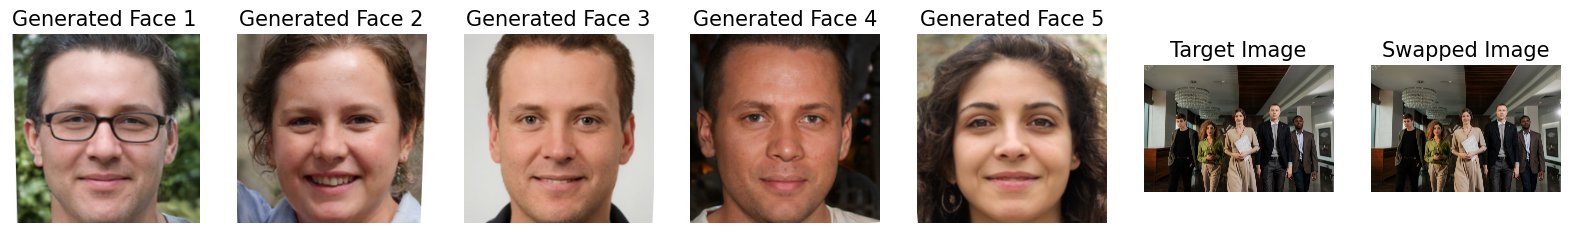

In [ ]:
#@markdown #**Visualize Image to Image swap**

import matplotlib.pyplot as plt
image_list = [sources[i][0][:, :, ::-1] for i in range(0, len(targets))]
image_list.append(target_full)
image_list.append(result)

image_name_list = ['Generated Face {}'.format(i+1) for i in range(0, len(targets))]
image_name_list.extend(['Target Image', 'Swapped Image'])
show_images(image_list, image_name_list, figsize=(20, 15))


# ([source[0][:, :, ::-1], target_full, result], ['Source Image', 'Target Image', 'Swapped Image'], figsize=(20, 15))


In [ ]:
%ls

AdaptiveWingLoss/  download_models.sh  LICENSE   preprocess_vgg.py        train.py
apex/              examples/           models/   README.md                utils/
arcface_model/     inference.py        my.png    requirements.txt         weights/
coordinate_reg/    insightface_func/   network/  SberSwapInference.ipynb


# All in one

In [ ]:
#@markdown #**Upload source image and video**

#@markdown choose not really long videos, coz it can take a lot of time otherwise

#@markdown choose source image as a photo -- preferable a selfie of a person

target_type = 'image' #@param ["video", "image"]


# source_path = '/content/spiderman.png' #@param {type:"string"}
target_path = '/content/street_4.jpg' #@param {type:"string"}
path_to_video = 'examples/videos/nggyup.mp4' #@param {type:"string"}

# source_full = cv2.imread(source_path)
OUT_VIDEO_NAME = "examples/results/result.mp4"
crop_size = 224 # don't change this


# check, if we can detect face on the source image

# try:
#     source = crop_face(source_full, app, crop_size)[0]
#     source = [source[:, :, ::-1]]
#     print("Everything is ok!")
# except TypeError:
#     print("Bad source images")

# read video
if target_type == 'image':
    target_full = cv2.imread(target_path)
    full_frames = [target_full]
else:
    full_frames, fps = read_video(path_to_video)

##
targets = get_target_loop(full_frames, app, crop_size)
targets = [[target] for target in targets]

##
gender_list = []
age_list = []

for i in range(0, len(targets)):
    img_frame = np.array(targets[i][0])
    # Load the image
    # img_frame = cv2.imread("/content/image_4.png")
    gender, age = detect_gender_age(img_frame)
    gender_list.append(gender)
    age_list.append(age)

##
textual_attribute_list = get_textual_attribute_list(gender_list, age_list)

##
textual_attribute_list, targets = filter_no_face(textual_attribute_list, targets)

##
generate_correct_images(G_style, len(targets), textual_attribute_list=textual_attribute_list, save_threshold=0.95, num_samples=4, iterations=100)

##
source_path = './'
sources = []
for i in range(len(targets)):
    source_full = cv2.imread(source_path + 'image_{}.png'.format(i+1))

    try:
        source = crop_face(source_full, app, crop_size)[0]
        source = [source[:, :, ::-1]]
        print("Everything is ok!")
    except TypeError:
        print("Bad source images")

    sources.append(source)

##




Gender: Male
Age: 25-32 years
Gender: Female
Age: 25-32 years
No face detected
Gender: Male
Age: 48-53 years
Everything is ok!
Everything is ok!
Everything is ok!


In [ ]:
#@markdown #**Inference**


batch_size =  60#@param {type:"integer"}


final_frames_list, crop_frames_list, full_frames, tfm_array_list = model_inference_loop(
    full_frames,
    sources,
    targets,
    netArc,
    G,
    app,
    set_target=False,
    similarity_th=0.15,
    crop_size=224,
    BS=batch_size,
    half=True
)


if use_sr:
    final_frames_list = face_enhancement(final_frames_list, model)

result = get_final_image_loop(final_frames_list, crop_frames_list, full_frames[0], tfm_array_list, handler)
cv2.imwrite('examples/results/result_2.png', result)


100%|██████████| 1/1 [00:00<00:00, 10.45it/s]
1it [00:00, 295.14it/s]
1it [00:00, 786.78it/s]
100%|██████████| 1/1 [00:00<00:00, 11.61it/s]
1it [00:00, 236.53it/s]
1it [00:00, 968.66it/s]
100%|██████████| 1/1 [00:00<00:00, 10.49it/s]
1it [00:00, 133.25it/s]
1it [00:00, 576.93it/s]
100%|██████████| 1/1 [00:00<00:00, 1959.04it/s]
1it [00:00,  5.52it/s]
1it [00:00,  6.06it/s]
1it [00:00,  6.03it/s]


True

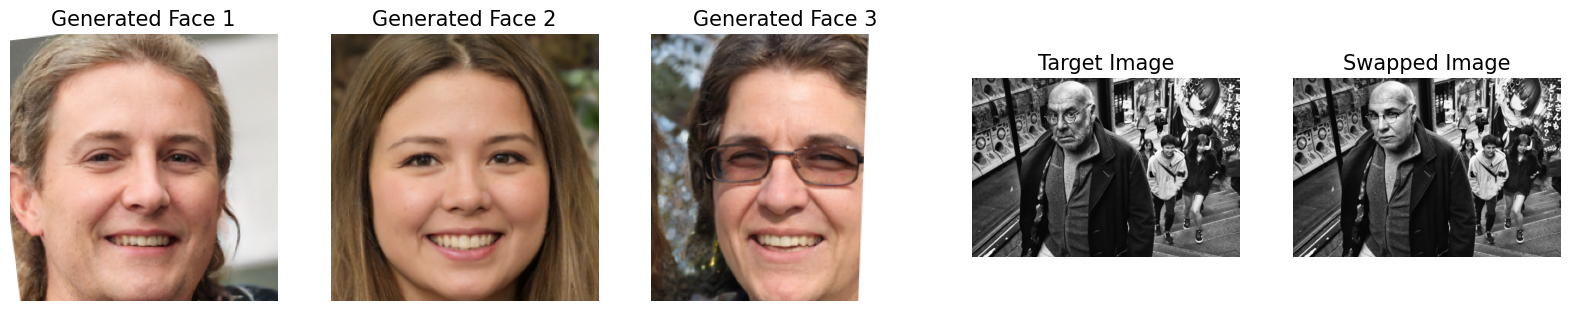

In [ ]:
#@markdown #**Visualize Image to Image swap**

import matplotlib.pyplot as plt
image_list = [sources[i][0][:, :, ::-1] for i in range(0, len(targets))]
image_list.append(target_full)
image_list.append(result)

image_name_list = ['Generated Face {}'.format(i+1) for i in range(0, len(targets))]
image_name_list.extend(['Target Image', 'Swapped Image'])
show_images(image_list, image_name_list, figsize=(20, 15))

